### Load prediction data

In [1]:
import pandas as pd
predictions = pd.read_csv("./data/predictions_test.csv")
predictions.head()

,label,predReg,predGbt
0,0,0.000048,0.000553
1,0,0.000258,0.004249
2,0,0.005530,0.003387
3,0,0.010935,0.010059
4,0,0.000002,0.000487


### ROC plot construction

The following method implements the generation of the points of a ROC curve for a given classifier:

In [2]:
def rocPoints(df, classifier):
    all_positives = (df["label"] == 1).sum()
    all_negatives = (df["label"] == 0).sum()
    tpr_points = [0]
    fpr_points = [0]
    thresholds_desc = df[classifier].sort_values(ascending=False) # = [0.97, 0.95, 0.94, ...]
    for c in thresholds_desc:
        df_above_c = df[df[classifier] >= c]  # part of df which is above threshold
        true_positives = (df_above_c["label"] == 1).sum()
        false_positives = (df_above_c["label"] == 0).sum()
        tpr_points.append(true_positives / all_positives)
        fpr_points.append(false_positives / all_negatives)
    return fpr_points, tpr_points

The following method implements the calculation of the area under the curve:

In [3]:
import numpy as np

def area_under_curve(fpr, tpr):
    y = np.array(tpr)
    x = np.array(fpr)
    return np.trapz(y, x) # Integrate using the composite trapezoidal rule

In [4]:
fpr_reg, tpr_reg = rocPoints(predictions, "predReg")
auc_reg = area_under_curve(fpr_reg, tpr_reg)

fpr_gbt, tpr_gbt = rocPoints(predictions, "predGbt")
auc_gbt = area_under_curve(fpr_gbt, tpr_gbt)

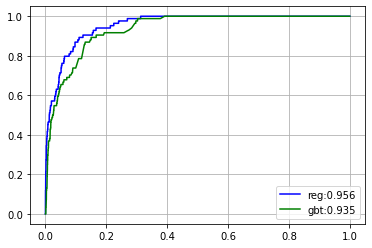

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color='blue', label=f"reg:{auc_reg:.3f}")
plt.plot(fpr_gbt, tpr_gbt, color='green', label=f"gbt:{auc_gbt:.3f}")
plt.legend()
plt.grid()
plt.show()

### Compare with ROC and AUC from sklearn

In [6]:
from sklearn.metrics import auc, roc_curve

fpr_reg, tpr_reg, _ = roc_curve(predictions["label"], predictions["predReg"])
auc_reg = auc(fpr_reg, tpr_reg)

fpr_gbt, tpr_gbt, _ = roc_curve(predictions["label"], predictions["predGbt"])
auc_gbt = auc(fpr_gbt, tpr_gbt)

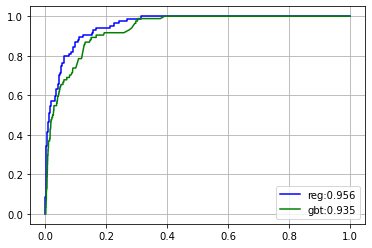

In [7]:
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label=f"reg:{auc_reg:.3f}")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label=f"gbt:{auc_gbt:.3f}")
plt.legend()
plt.grid()
plt.show()